##  Data Pre-Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Fuel_Consumption.csv')

# Display the first few rows of the dataset
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [4]:
# Impute missing values for numerical columns with the median
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.median()))

# Impute missing values for categorical columns with the mode
cat_cols = data.select_dtypes(include=[object]).columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [5]:
# Verify that there are no more missing values
missing_values_after_imputation = data.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after_imputation)


Missing Values After Imputation:
 YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [6]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 1


In [7]:
# Drop duplicates (if any)
data = data.drop_duplicates()

In [8]:
# Select only numeric columns for outlier detection
numeric_cols = data.select_dtypes(include='number').columns
data_numeric = data[numeric_cols]

In [9]:
# Handle outliers using IQR
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Removing outliers from the dataset
data_outliers_removed = data[~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDataFrame after removing outliers:")
print(data_outliers_removed.head())


DataFrame after removing outliers:
   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        23

In [11]:
# Display the cleaned data
print("\nCleaned Data:\n", data.head())


Cleaned Data:
    YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4

In [12]:
# Verify the data types
print(data_outliers_removed.dtypes)

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object


In [13]:
# Group by 'MAKE' and calculate average 'CO_EMISSIONS'
average_emissions_by_make = data.groupby('MAKE')['EMISSIONS'].mean()
print(average_emissions_by_make)

MAKE
ACURA           216.538071
ALFA ROMEO      207.875000
ASTON MARTIN    339.787500
AUDI            247.055829
Acura           231.660000
                   ...    
Toyota          209.012397
VOLKSWAGEN      206.996700
VOLVO           231.363229
Volkswagen      210.884211
Volvo           222.260870
Name: EMISSIONS, Length: 87, dtype: float64


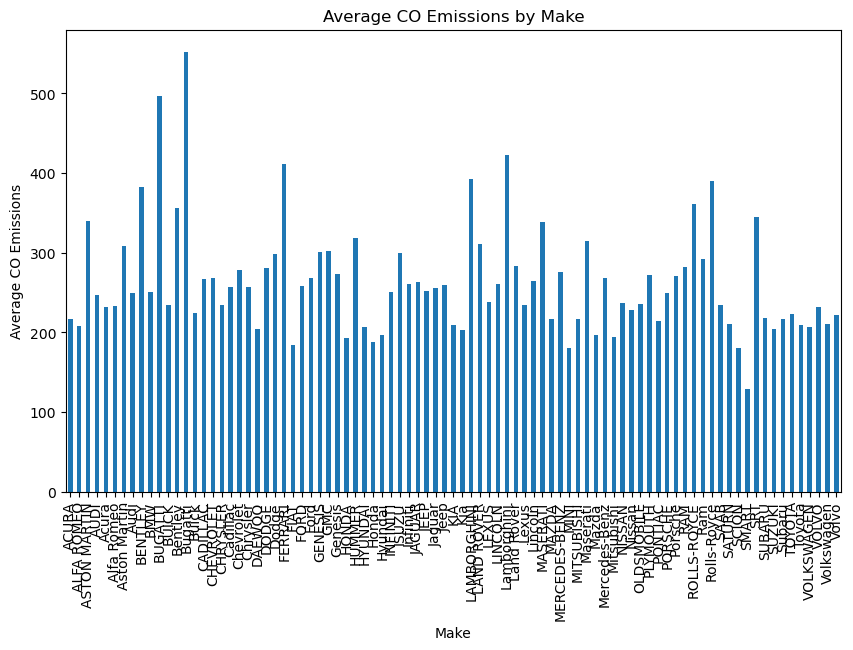

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting the average CO emissions by make
plt.figure(figsize=(10, 6))
average_emissions_by_make.plot(kind='bar')
plt.title('Average CO Emissions by Make')
plt.xlabel('Make')
plt.ylabel('Average CO Emissions')
plt.show()

##  Exploratory Data Analysis

In [16]:
# Basic statistics
summary = data.describe()
print("\nSummary Statistics:\n", summary)


Summary Statistics:
                YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22555.000000  22555.000000  22555.000000      22555.000000   
mean    2011.554955      3.356617      5.854046         12.763294   
std        6.297939      1.335448      1.819582          3.500922   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.700000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22555.000000     22555.000000  22555.000000  22555.000000  
mean         8.918958        11.034148     27.374950    250.063844  
std          2.274675         2.910839      7.376881     59.352558  
min          3.200000         3.600000     11.000000     83.000000  
25%        

In [20]:
data = pd.DataFrame(data)

# Selecting only the numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                       YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  \
YEAR              1.000000    -0.077749  -0.072518         -0.098528   
ENGINE SIZE      -0.077749     1.000000   0.913385          0.821615   
CYLINDERS        -0.072518     0.913385   1.000000          0.794928   
FUEL CONSUMPTION -0.098528     0.821615   0.794928          1.000000   
HWY (L/100 km)   -0.007337     0.749409   0.698321          0.942347   
COMB (L/100 km)  -0.067906     0.807329   0.771571          0.992959   
COMB (mpg)        0.079895    -0.755006  -0.714196         -0.921355   
EMISSIONS        -0.047733     0.821308   0.802164          0.919094   

                  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  EMISSIONS  
YEAR                   -0.007337        -0.067906    0.079895  -0.047733  
ENGINE SIZE             0.749409         0.807329   -0.755006   0.821308  
CYLINDERS               0.698321         0.771571   -0.714196   0.802164  
FUEL CONSUMPTION        0.9423

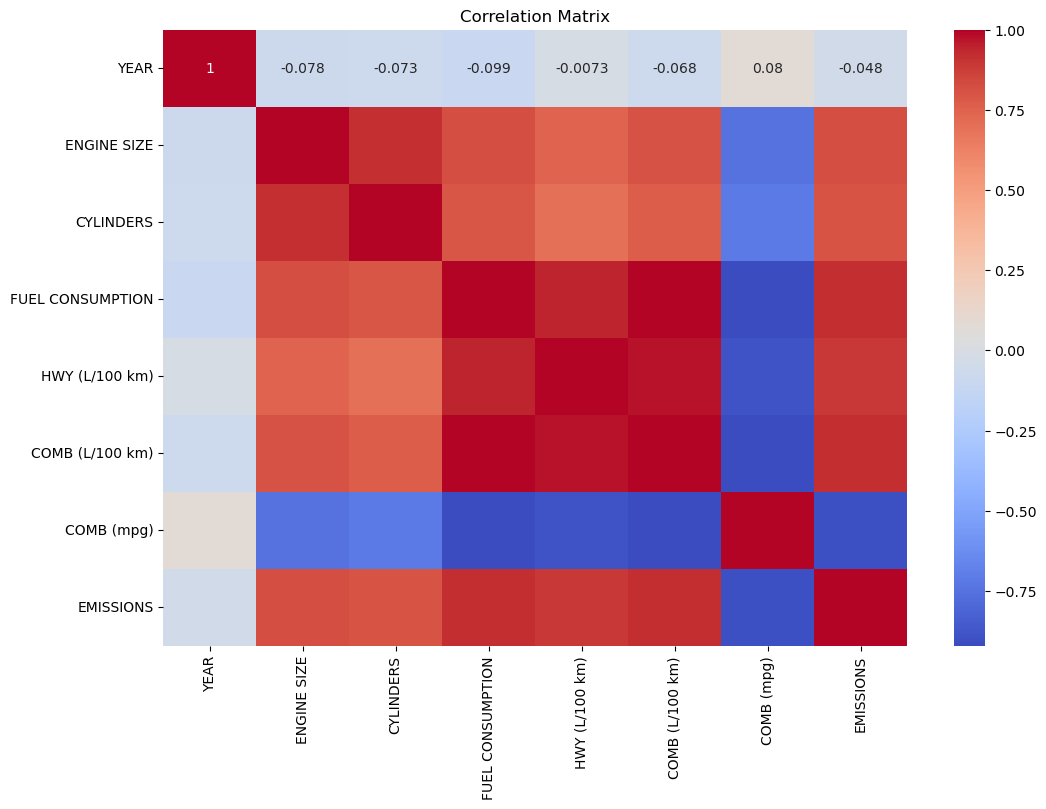

In [25]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


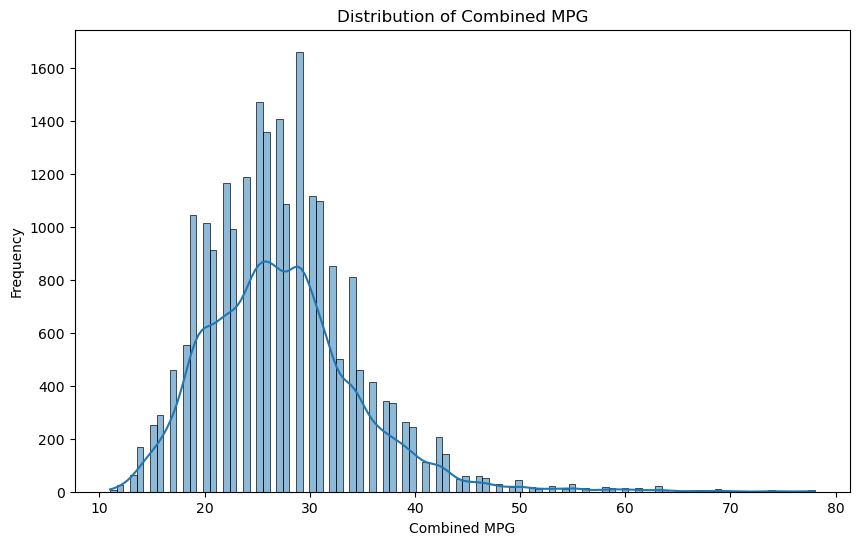

In [17]:
# Distribution of 'COMB (mpg)'
plt.figure(figsize=(10, 6))
sns.histplot(data['COMB (mpg)'], kde=True)
plt.title('Distribution of Combined MPG')
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.show()

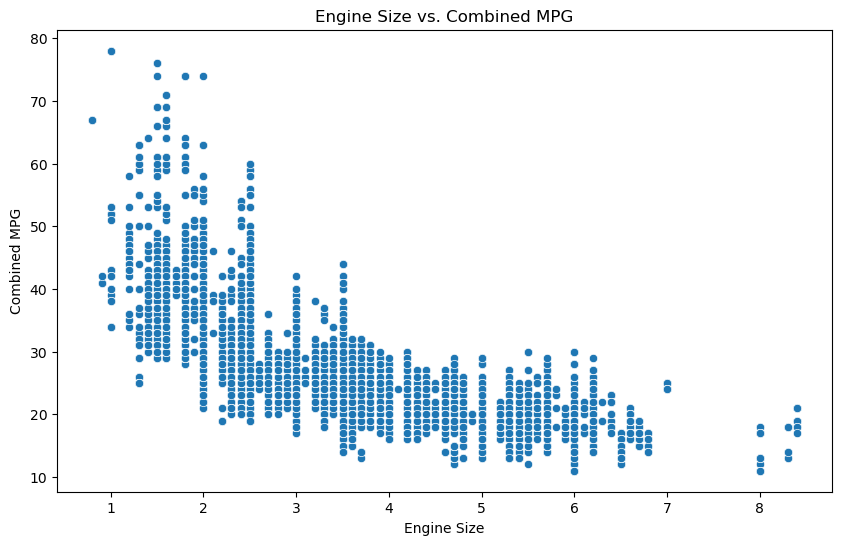

In [18]:
# Scatter plot of Engine Size vs. Combined MPG
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ENGINE SIZE', y='COMB (mpg)', data=data)
plt.title('Engine Size vs. Combined MPG')
plt.xlabel('Engine Size')
plt.ylabel('Combined MPG')
plt.show()

In [22]:
# Selecting only the numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [23]:
# Calculate skewness for each numeric column
skewness = data[numeric_columns].skew()
print("Skewness:\n", skewness)

Skewness:
 YEAR               -0.076006
ENGINE SIZE         0.631319
CYLINDERS           0.911443
FUEL CONSUMPTION    0.760971
HWY (L/100 km)      0.936788
COMB (L/100 km)     0.817219
COMB (mpg)          1.172822
EMISSIONS           0.534733
dtype: float64


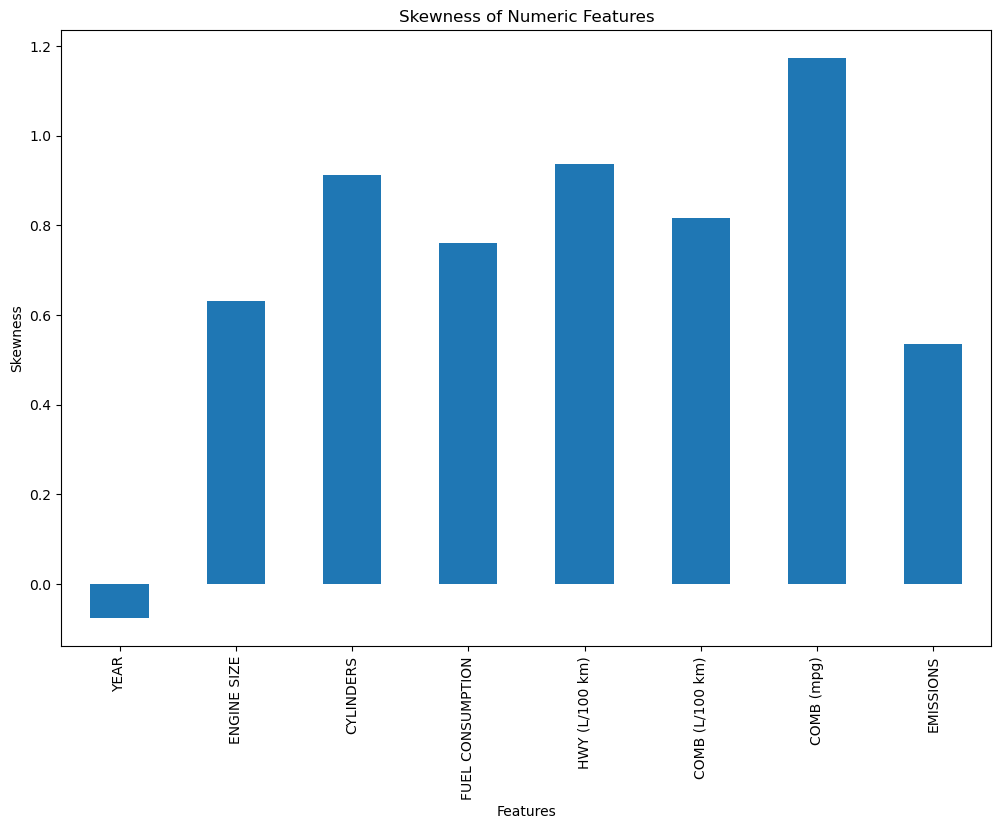

In [24]:
# Visualize skewness using a bar plot
plt.figure(figsize=(12, 8))
skewness.plot(kind='bar')
plt.title('Skewness of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()